<a href="https://colab.research.google.com/github/pra1608/quality-Prediction-in-mining/blob/main/ARLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas

import statsmodels.api as sm

from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)

In [5]:
quarterly = dates["year"] + "Q" + dates["quarter"]

In [6]:
quarterly

0      1959Q1
1      1959Q2
2      1959Q3
3      1959Q4
4      1960Q1
        ...  
198    2008Q3
199    2008Q4
200    2009Q1
201    2009Q2
202    2009Q3
Length: 203, dtype: object

In [7]:
from statsmodels.tsa.base.datetools import dates_from_str


In [8]:
quarterly = dates_from_str(quarterly)

In [9]:
quarterly

[datetime.datetime(1959, 3, 31, 0, 0),
 datetime.datetime(1959, 6, 30, 0, 0),
 datetime.datetime(1959, 9, 30, 0, 0),
 datetime.datetime(1959, 12, 31, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 3, 31, 0, 0),
 datetime.datetime(1961, 6, 30, 0, 0),
 datetime.datetime(1961, 9, 30, 0, 0),
 datetime.datetime(1961, 12, 31, 0, 0),
 datetime.datetime(1962, 3, 31, 0, 0),
 datetime.datetime(1962, 6, 30, 0, 0),
 datetime.datetime(1962, 9, 30, 0, 0),
 datetime.datetime(1962, 12, 31, 0, 0),
 datetime.datetime(1963, 3, 31, 0, 0),
 datetime.datetime(1963, 6, 30, 0, 0),
 datetime.datetime(1963, 9, 30, 0, 0),
 datetime.datetime(1963, 12, 31, 0, 0),
 datetime.datetime(1964, 3, 31, 0, 0),
 datetime.datetime(1964, 6, 30, 0, 0),
 datetime.datetime(1964, 9, 30, 0, 0),
 datetime.datetime(1964, 12, 31, 0, 0),
 datetime.datetime(1965, 3, 31, 0, 0),
 datetime.datetime(

In [10]:
mdata = mdata[['realgdp','realcons','realinv']]

In [11]:
mdata

,realgdp,realcons,realinv
0,2710.349,1707.4,286.898
1,2778.801,1733.7,310.859
2,2775.488,1751.8,289.226
3,2785.204,1753.7,299.356
4,2847.699,1770.5,331.722
...,...,...,...
198,13324.600,9267.7,1990.693
199,13141.920,9195.3,1857.661
200,12925.410,9209.2,1558.494
201,12901.504,9189.0,1456.678


In [12]:
 mdata.index = pandas.DatetimeIndex(quarterly)


In [13]:
data = np.log(mdata).diff().dropna()


In [14]:
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


In [15]:
model = VAR(data)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [20]:
 results = model.fit(3)

In [21]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 09, Nov, 2020
Time:                     17:54:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

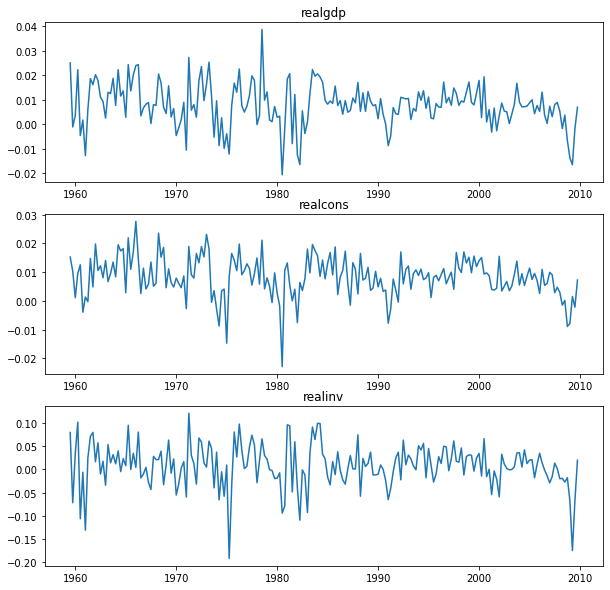

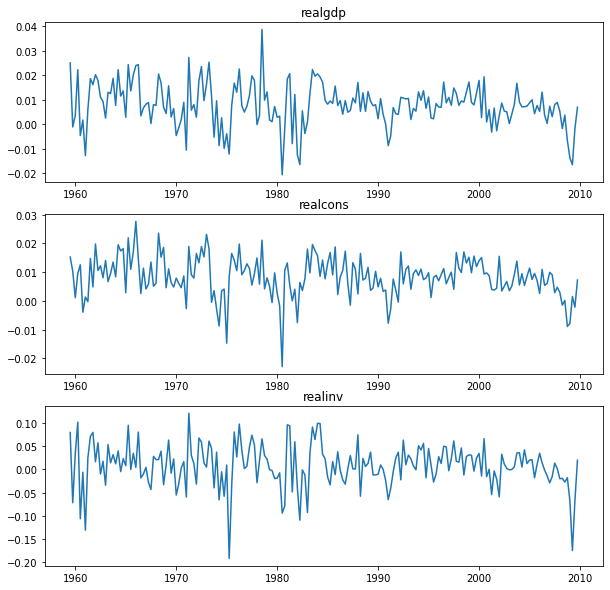

In [22]:
results.plot()

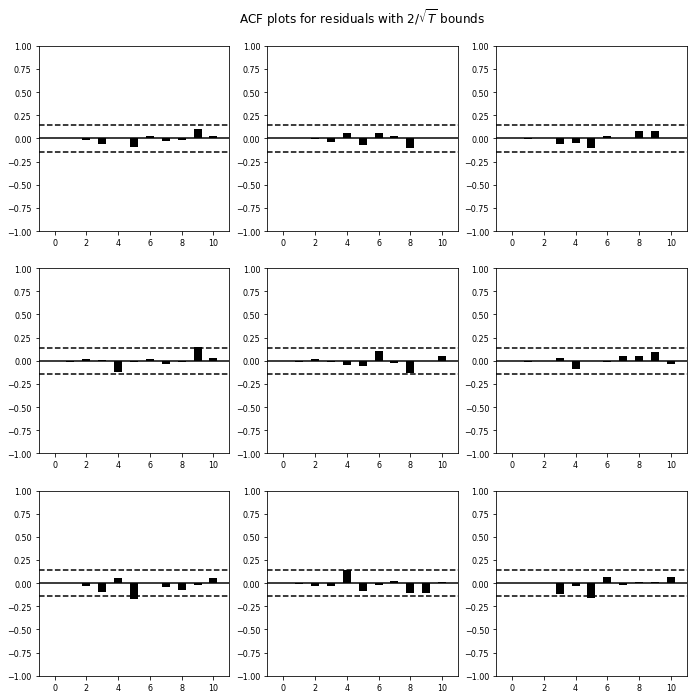

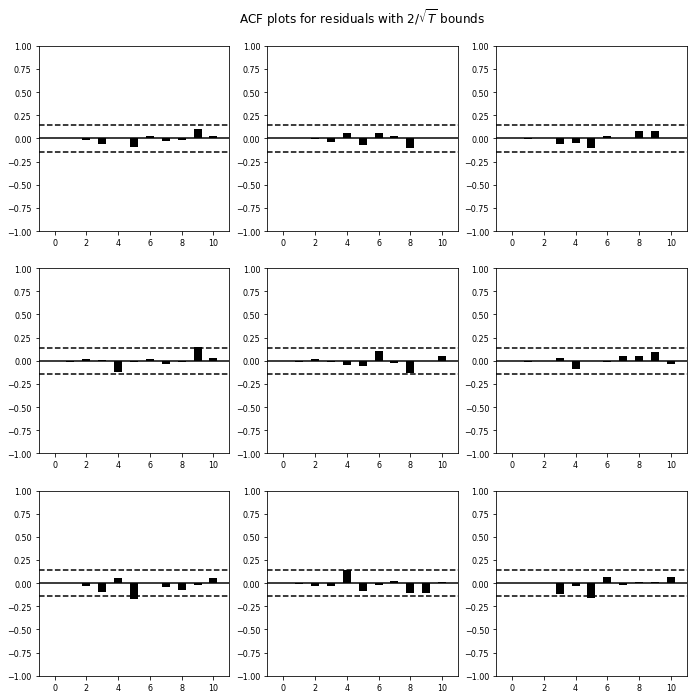

In [23]:
results.plot_acorr()

In [32]:
model.select_order(20)

In [37]:
results = model.fit(maxlags=10, ic='aic')

In [38]:
lag_order = results.k_ar

In [39]:
lag_order


1

In [40]:
 lag_order = results.k_ar

In [41]:
results.forecast(data.values[-lag_order:], 5)


array([[0.00785158, 0.00860589, 0.00834729],
       [0.00783132, 0.00840891, 0.00873314],
       [0.00771352, 0.00836347, 0.00799093],
       [0.00767643, 0.00833281, 0.00782077],
       [0.00765623, 0.0083205 , 0.00771132]])

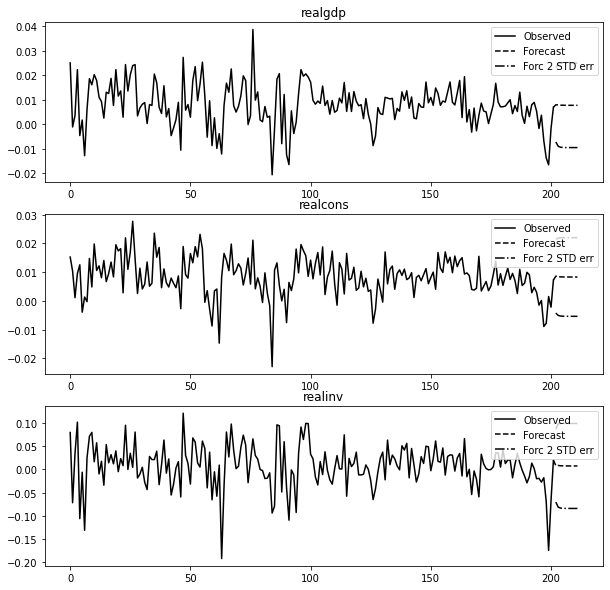

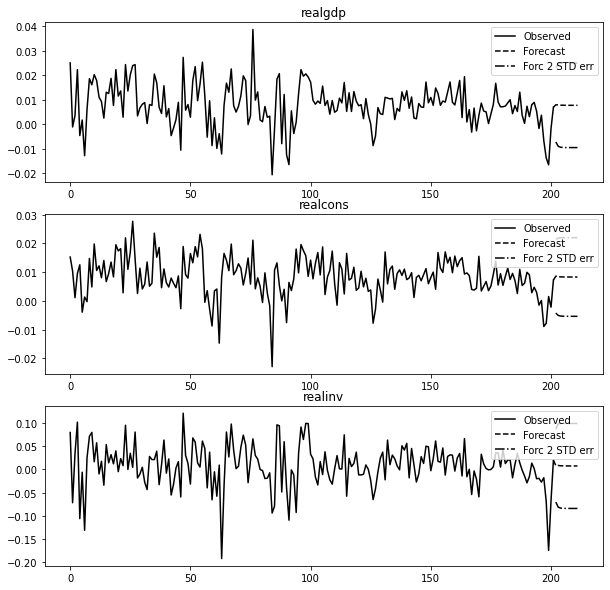

In [42]:
results.plot_forecast(10)